<a href="https://colab.research.google.com/github/KishorAlagappan/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Conversion Prediction**


In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
dataset = pd.read_csv('train.csv')  
dataset.head(10)  

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
dataset.shape

(45211, 11)

In [ ]:
dataset.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(45205, 11)

In [ ]:
dataset.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
dataset.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**Missing Value Analysis**

In [ ]:
(dataset['age'].value_counts()).sort_index()

18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [ ]:
dataset['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
dataset['job'].replace('unknown', 'blue-collar', inplace = True)

In [ ]:
dataset['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
dataset['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
dataset['education_qual'].replace('unknown', 'secondary', inplace = True)

In [ ]:
dataset['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
dataset['day'].value_counts().sort_index()

1      322
2     1292
3     1079
4     1445
5     1910
6     1932
7     1817
8     1840
9     1560
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1756
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1829
29    1745
30    1566
31     643
Name: day, dtype: int64

In [ ]:
dataset['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
dataset['dur'].value_counts().sort_index()

0        3
1        2
2        3
3        4
4       15
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: dur, Length: 1573, dtype: int64

In [ ]:
dataset['num_calls'].value_counts().sort_index()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: num_calls, dtype: int64

In [ ]:
dataset['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
dataset['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

Outlier Detection

In [ ]:
dataset.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
iqr_age = dataset.age.quantile(0.75) - dataset.age.quantile(0.25)
iqr_age

15.0

In [ ]:
lower_limit_age = dataset.age.quantile(0.25) - (1.5 * iqr_age)
lower_limit_age

10.5

In [ ]:
upper_limit_age = dataset.age.quantile(0.75) + (1.5 * iqr_age)
upper_limit_age

70.5

In [ ]:
dataset['age'] = dataset['age'].clip(lower_limit_age, upper_limit_age )

In [ ]:
iqr_dur = dataset.dur.quantile(0.75) - dataset.dur.quantile(0.25)
iqr_dur

216.0

In [ ]:
lower_limit_dur = dataset.dur.quantile(0.25) - (1.5 * iqr_dur)
lower_limit_dur

-221.0

In [ ]:
upper_limit_dur = dataset.dur.quantile(0.75) + (1.5 * iqr_dur)
upper_limit_dur

643.0

In [ ]:
dataset['dur'] = dataset['dur'].clip(lower_limit_dur,upper_limit_dur)

In [ ]:
iqr_call = dataset.num_calls.quantile(0.75) - dataset.num_calls.quantile(0.25)
iqr_call

2.0

In [ ]:
lower_limit_call = dataset.num_calls.quantile(0.25) - (1.5 * iqr_call)
lower_limit_call 

-2.0

In [ ]:
upper_limit_call = dataset.num_calls.quantile(0.75) + (1.5 * iqr_call)
upper_limit_call

6.0

In [ ]:
dataset['num_calls'] = dataset['num_calls'].clip(lower_limit_call, upper_limit_call)

In [ ]:
dataset.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235,0.117000
std,10.395247,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.500000,31.00000,643.00000,6.000000,1.000000


**EDA - Exploratory Data Analysis**

Target Variable - ('y')

In [ ]:
dataset['target'] = dataset['y'].map({"yes":1, "no":0})

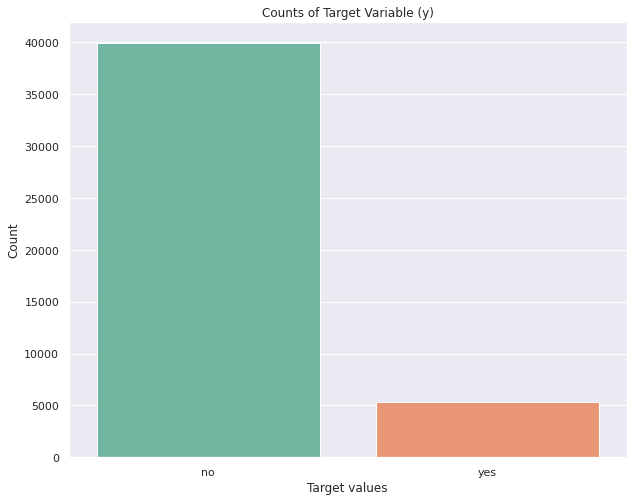

In [ ]:
sns.countplot(x='y', data=dataset, palette='Set2')
plt.xlabel('Target values')
plt.ylabel('Count')
plt.title('Counts of Target Variable (y)')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Feature - 01 ('age')

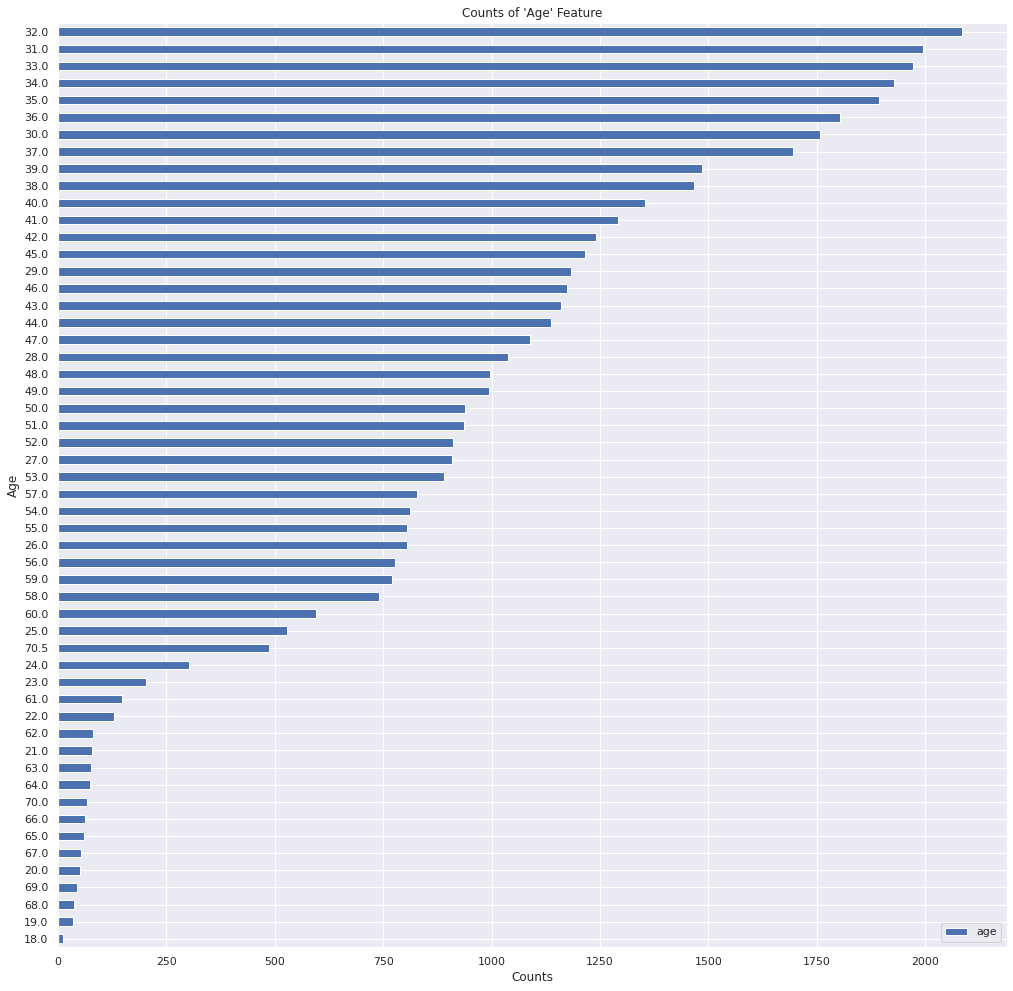

In [ ]:
pd.DataFrame(dataset['age'].value_counts().sort_values()).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Age')
plt.title("Counts of 'Age' Feature")
plt.rcParams['figure.figsize'] = [17,17]
plt.show()

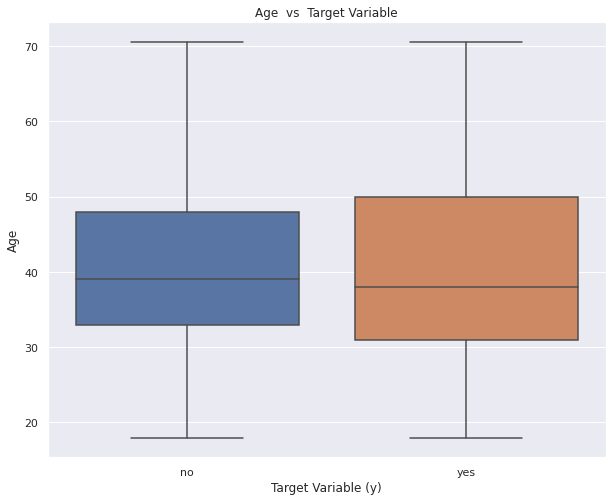

In [ ]:
sns.boxplot(data=dataset, x='y', y='age')
plt.xlabel('Target Variable (y)')
plt.ylabel('Age')
plt.title('Age  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Feature - 2  ('job')

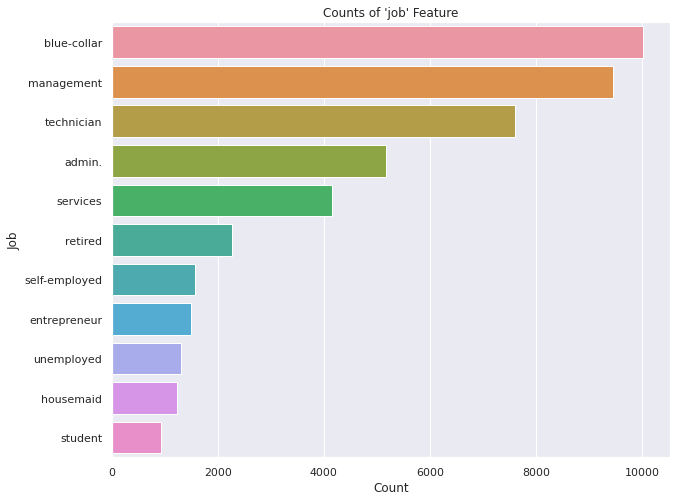

In [ ]:
v_job = pd.DataFrame(dataset['job'].value_counts()).reset_index()
v_job.rename(columns= {'index':'Job', 'job':'Count'}, inplace= True)
plt.title('Counts of \'job\' Feature')
sns.barplot(x= v_job['Count'], y= v_job['Job'], data= v_job)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

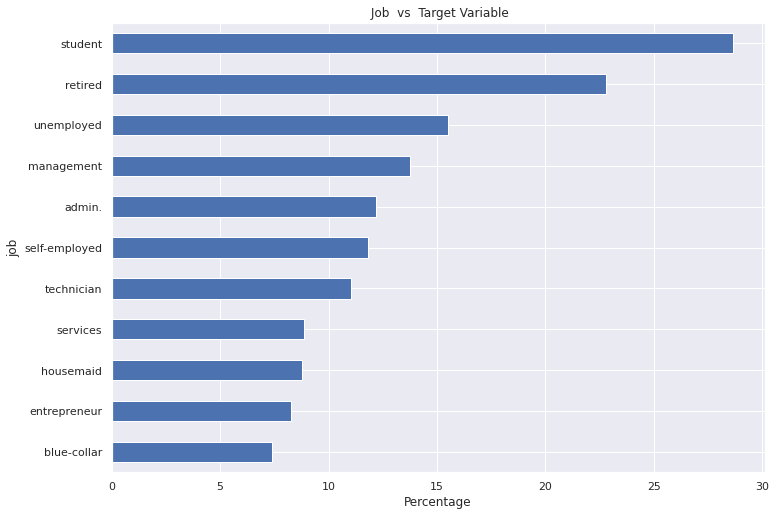

In [ ]:
(dataset.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title(' Job  vs  Target Variable')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

In [ ]:
job_per = pd.DataFrame(((dataset.groupby('job')['target'].mean()*100).round(decimals =2)).sort_values(ascending= False)).reset_index()
job_per.rename(columns= {'target':'Percentage'}, inplace= True)
job_per

,job,Percentage
0,student,28.68
1,retired,22.79
2,unemployed,15.50
3,management,13.76
4,admin.,12.21
5,self-employed,11.84
6,technician,11.06
7,services,8.89
8,housemaid,8.79
9,entrepreneur,8.27


Feature - 3 ('marital') 

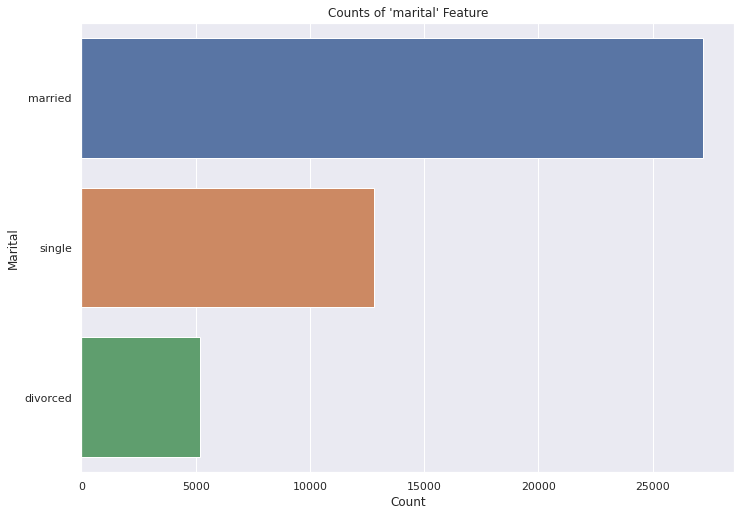

In [ ]:
v_mar = pd.DataFrame(dataset['marital'].value_counts()).reset_index()
v_mar.rename(columns={'index':'Marital', 'marital':'Count'}, inplace=True)
sns.barplot(x= v_mar['Count'], y= v_mar['Marital'], data=v_mar)
plt.title('Counts of \'marital\' Feature')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

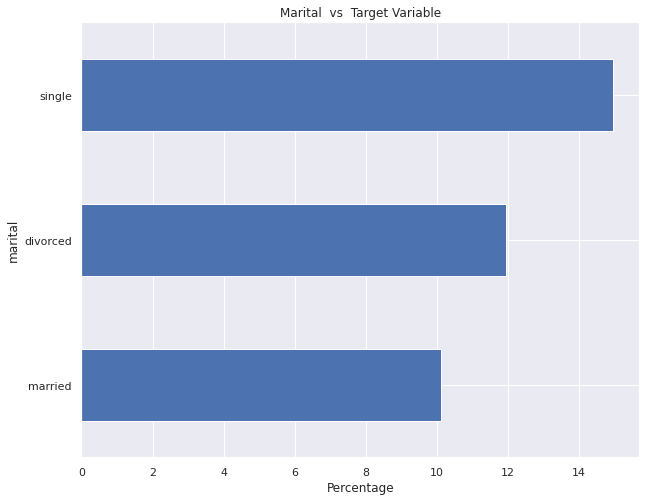

In [ ]:
(dataset.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Marital  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [ ]:
m_per = pd.DataFrame(((dataset.groupby('marital')['target'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
m_per.rename(columns= {'target':'Percentage'}, inplace = True)
m_per

,marital,Percentage
0,single,14.95
1,divorced,11.95
2,married,10.12


Feature - 4 ('education_qual')

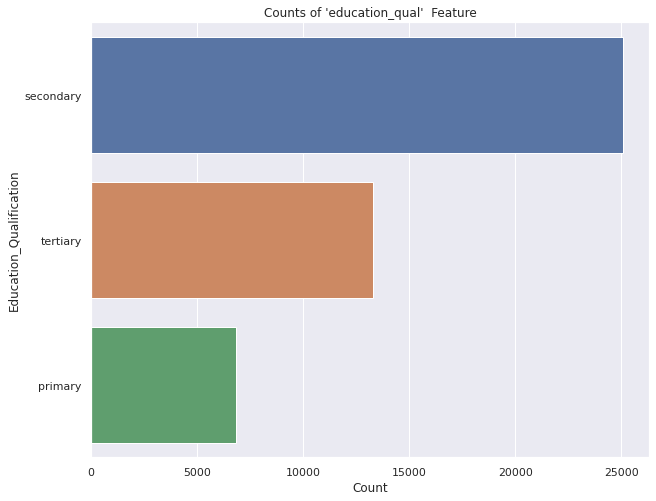

In [ ]:
v_edu= pd.DataFrame(dataset['education_qual'].value_counts()).reset_index()
v_edu.rename(columns= {'index':'Education_Qualification', 'education_qual':'Count'}, inplace=True)
sns.barplot(x= v_edu['Count'], y= v_edu['Education_Qualification'], data= v_edu)
plt.title('Counts of \'education_qual\'  Feature')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

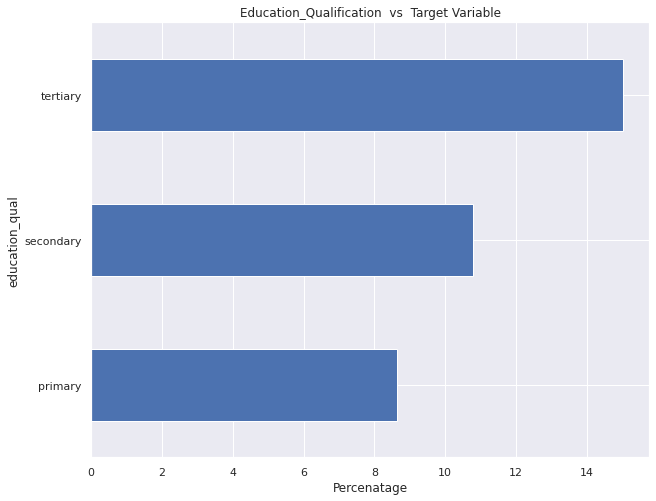

In [ ]:
(dataset.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percenatage')
plt.title('Education_Qualification  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [ ]:
e_per = pd.DataFrame(((dataset.groupby('education_qual')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
e_per.rename(columns={'target':'Percentage'}, inplace= True)
e_per

,education_qual,Percentage
0,tertiary,15.01
1,secondary,10.78
2,primary,8.63


Feature - 5 ('call_type')

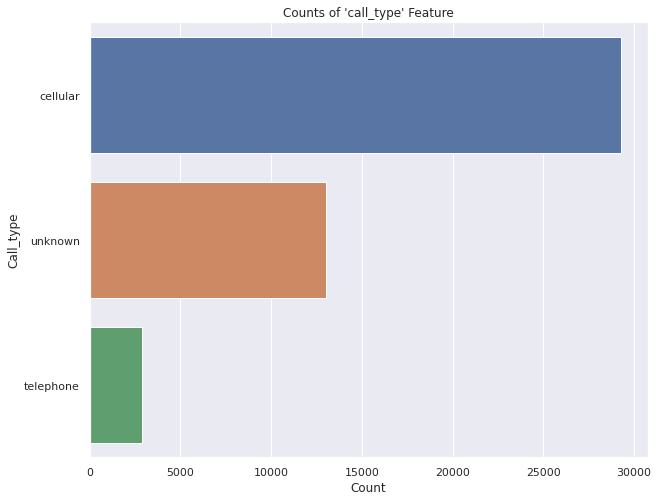

In [ ]:
v_call= pd.DataFrame(dataset['call_type'].value_counts()).reset_index()
v_call.rename(columns={'index':'Call_type', 'call_type':'Count'}, inplace= True)
sns.barplot(x= v_call['Count'], y=v_call['Call_type'], data=v_call)
plt.title('Counts of \'call_type\' Feature')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

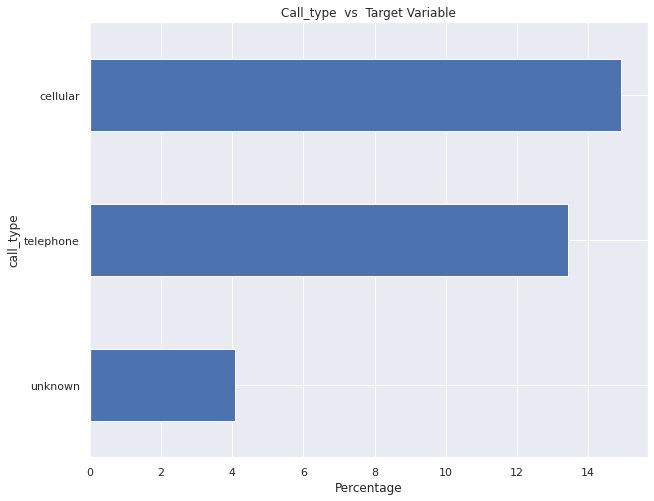

In [ ]:
(dataset.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Call_type  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [ ]:
c_per = pd.DataFrame(((dataset.groupby('call_type')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
c_per.rename(columns={'target':'percentage'}, inplace= True)
c_per

,call_type,percentage
0,cellular,14.92
1,telephone,13.42
2,unknown,4.07


Feature - 6 ('day')

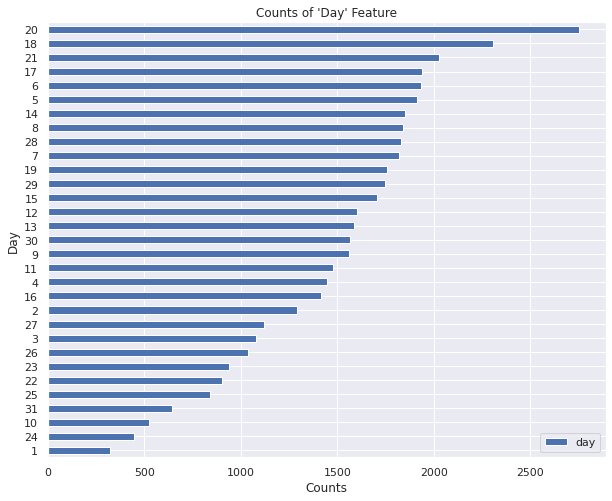

In [ ]:
pd.DataFrame(dataset['day'].value_counts().sort_values()).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Day')
plt.title("Counts of 'Day' Feature")
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

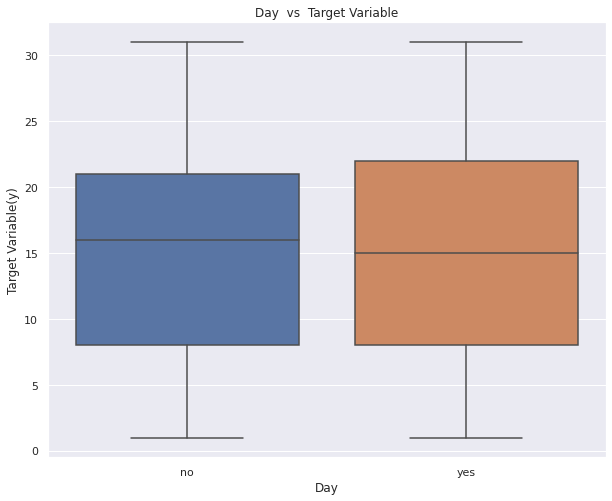

In [ ]:
sns.boxplot(data=dataset, x='y', y='day')
plt.xlabel('Day')
plt.ylabel('Target Variable(y)')
plt.title('Day  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Feature - 7 ('mon') 

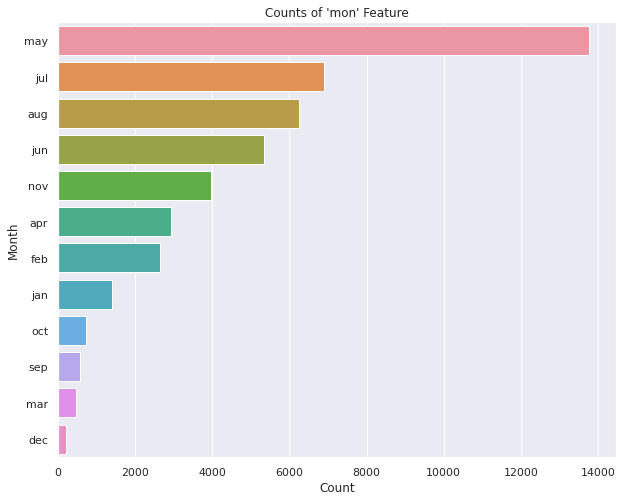

In [ ]:
v_mon = pd.DataFrame(dataset['mon'].value_counts()).reset_index()
v_mon.rename(columns= {'index':'Month', 'mon':'Count'}, inplace= True)
sns.barplot(x= v_mon['Count'], y=v_mon['Month'], data= v_mon) 
plt.title("Counts of 'mon' Feature")
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

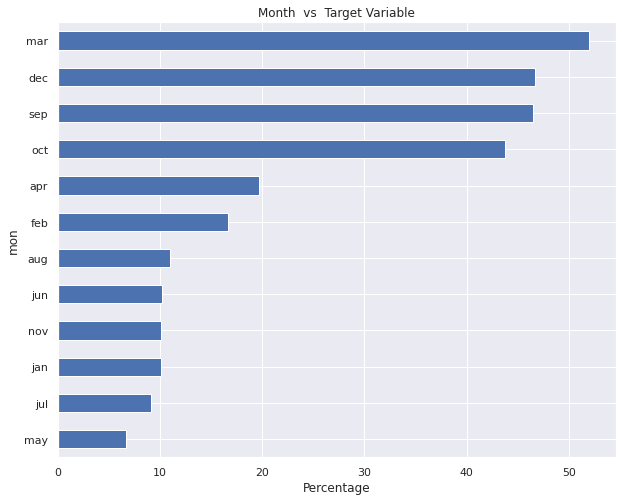

In [ ]:
(dataset.groupby('mon')['target'].mean()*100).sort_values().plot(kind= 'barh')
plt.xlabel('Percentage')
plt.title('Month  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [ ]:
mo_per = pd.DataFrame(((dataset.groupby('mon')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
mo_per.rename(columns={'target':'Percentage'}, inplace= True)
mo_per

,mon,Percentage
0,mar,51.99
1,dec,46.73
2,sep,46.46
3,oct,43.77
4,apr,19.68
5,feb,16.65
6,aug,11.02
7,jun,10.23
8,nov,10.15
9,jan,10.12


Feature - 8 ('dur')

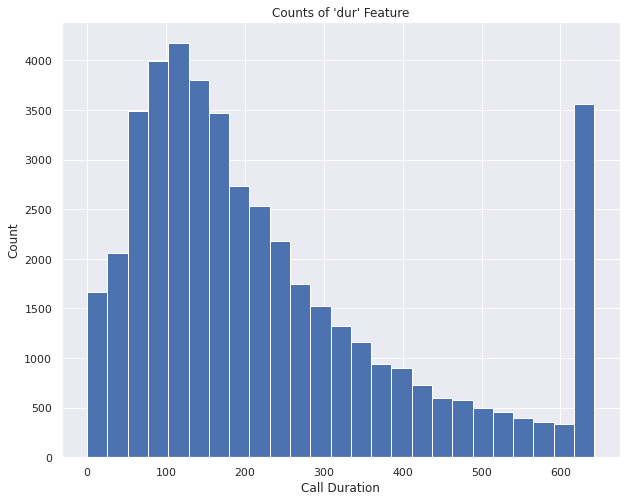

In [ ]:
plt.hist(dataset.dur, bins= 25)
plt.xlabel('Call Duration')
plt.ylabel('Count')
plt.title("Counts of 'dur' Feature")
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

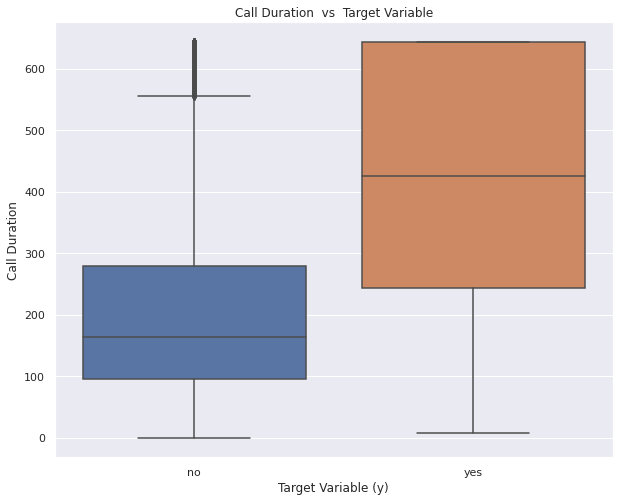

In [ ]:
sns.boxplot(data=dataset, x='y', y='dur')
plt.xlabel('Target Variable (y)')
plt.ylabel('Call Duration')
plt.title('Call Duration  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Feature - 9 ('num_calls')

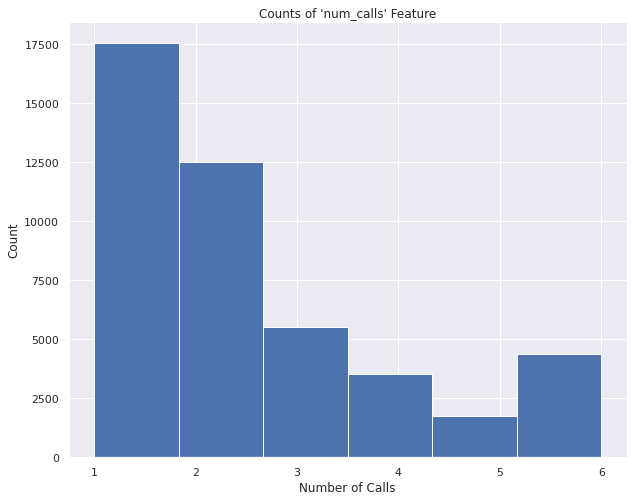

In [ ]:
plt.hist(dataset.num_calls,bins=6)
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.title("Counts of 'num_calls' Feature")
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

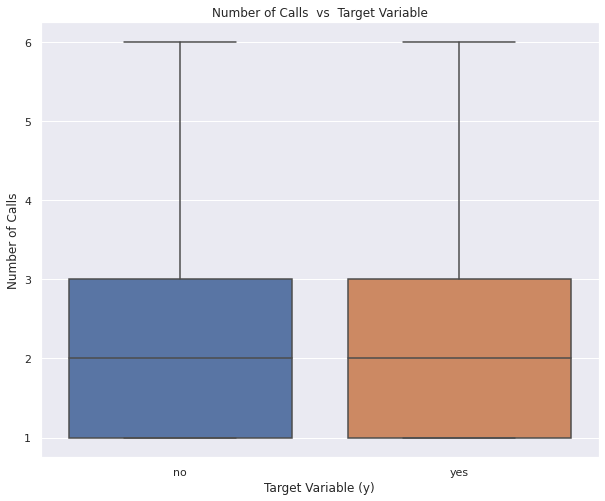

In [ ]:
sns.boxplot(data=dataset, x='y', y='num_calls')
plt.xlabel('Target Variable (y)')
plt.ylabel('Number of Calls')
plt.title('Number of Calls  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

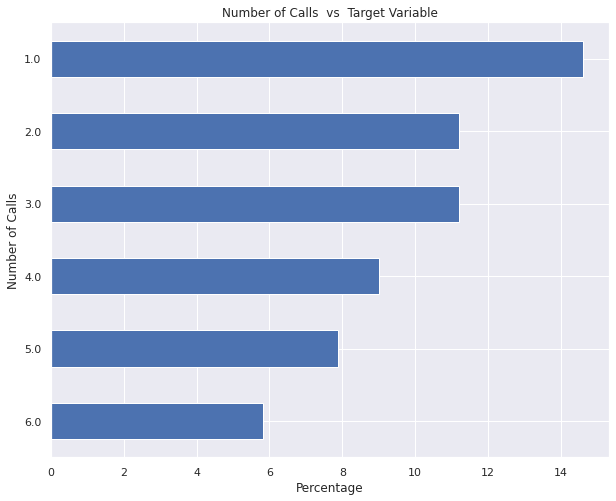

In [ ]:
(dataset.groupby('num_calls')['target'].mean()*100).sort_values().plot(kind= 'barh')
plt.xlabel('Percentage')
plt.ylabel('Number of Calls')
plt.title('Number of Calls  vs  Target Variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Feature - 10 ('prev_outcome')

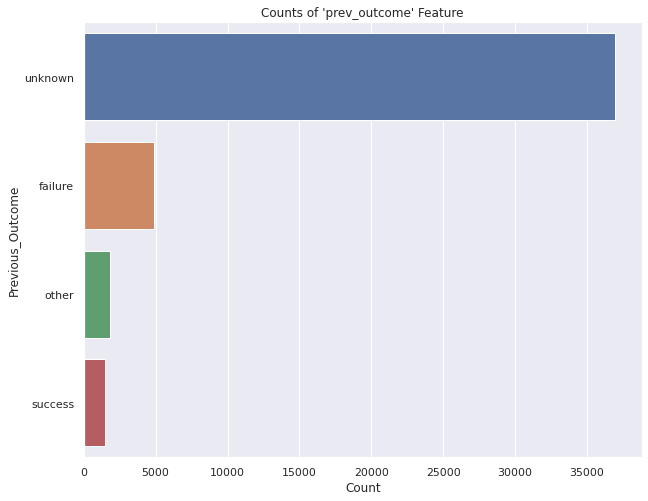

In [ ]:
v_pre = pd.DataFrame(dataset['prev_outcome'].value_counts()).reset_index()
v_pre.rename(columns={'index':'Previous_Outcome', 'prev_outcome': 'Count'}, inplace= True)
sns.barplot(x= v_pre['Count'], y= v_pre['Previous_Outcome'], data=v_pre)
plt.title("Counts of 'prev_outcome' Feature")
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

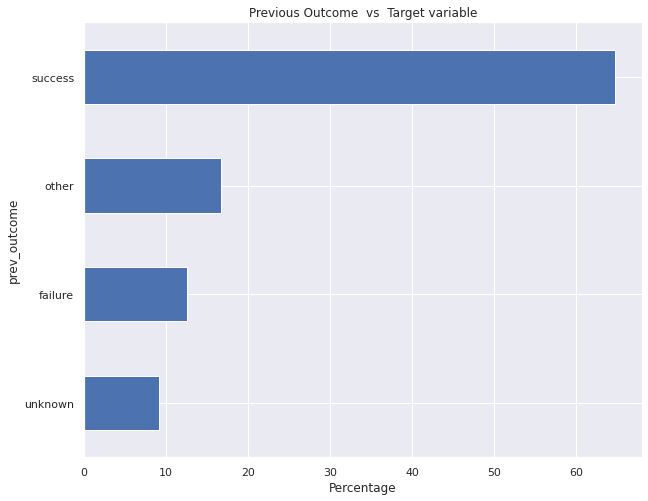

In [ ]:
(dataset.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Previous Outcome  vs  Target variable')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [ ]:
p_per = pd.DataFrame(((dataset.groupby('prev_outcome')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
p_per.rename(columns={'target':'Percentage'}, inplace= True)
p_per

,prev_outcome,Percentage
0,success,64.73
1,other,16.68
2,failure,12.61
3,unknown,9.16
